In [73]:
import numpy as np

import pandas as pd

import math

import scipy

from scipy.special import gammaln

from scipy.special import gamma

from scipy.stats import dirichlet

from numpy import asarray

import sys

from sklearn import datasets

from sklearn import preprocessing

from sklearn.cluster import KMeans

from numpy import min as MIN, max as MAX

from numpy import mean as MEAN

from numpy import var as VAR

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix 

from sklearn.metrics import accuracy_score 

from sklearn.metrics import classification_report 

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

from sklearn.metrics import f1_score

from sklearn.metrics import precision_recall_fscore_support

import pylab as pl

from scipy.stats import dirichlet

In [74]:
dataset = pd.read_csv('breast_tissue_editted - Sheet1.csv')


data_x = dataset.iloc[:, 0:dataset.shape[1]-1]

y = dataset.iloc[:,-1].values
y



array([0, 0, 0, ..., 1, 1, 1])

In [75]:
num_sample = data_x.shape[0]
num_sample
#num_dimension = data_x.shape[1]
#num_dimension

1999

In [76]:
num_dimension = data_x.shape[1]
num_dimension

126

In [77]:
#normalizing data

min_max_scaler = preprocessing.MinMaxScaler()

data_normalize = min_max_scaler.fit_transform(data_x)

for i in range(num_sample):

    for j in range(num_dimension):

        if data_normalize[i,j] ==0: 

            data_normalize[i,j]= 0.00001

        elif data_normalize[i,j]==1:

            data_normalize[i,j]= 0.9999 
            

In [78]:
data_normalize

array([[0.72786373, 0.95964825, 0.69246147, ..., 0.81996102, 0.63218102,
        0.73827925],
       [0.85423589, 0.77609202, 0.66650773, ..., 0.6943586 , 0.7785616 ,
        0.73774   ],
       [0.8383175 , 0.79028785, 0.79104509, ..., 0.79636621, 0.97741802,
        0.96863808],
       ...,
       [0.10676664, 0.18657717, 0.22485332, ..., 0.1633719 , 0.29234305,
        0.39133884],
       [0.32482201, 0.21929958, 0.28999789, ..., 0.05212359, 0.31871712,
        0.01115699],
       [0.0483912 , 0.37636962, 0.47502266, ..., 0.33003668, 0.03978701,
        0.16476566]])

In [79]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data_normalize)
class_labels = kmeans.labels_

confusion_matrix(class_labels,y)

array([[ 999,    0],
       [   0, 1000]])

In [80]:
def split_pixels_based_on_label(labels, data):

    clusters_obj = {}

    for index, label in enumerate(labels):

        if not (label in clusters_obj):

            clusters_obj[label] = []

        clusters_obj[label].append(data[index])

    return clusters_obj





clusters_set= split_pixels_based_on_label(class_labels, data_normalize)

clusters_set

{0: [array([0.72786373, 0.95964825, 0.69246147, 0.92630461, 0.79626177,
         0.80378061, 0.63680669, 0.68119737, 0.98963262, 0.7893112 ,
         0.7492335 , 0.76341916, 0.69443827, 0.67407341, 0.94772352,
         0.98571234, 0.65957066, 0.92260539, 0.81893974, 0.9564774 ,
         0.66915902, 0.69753749, 0.66057304, 0.82089294, 0.74220486,
         0.6476638 , 0.9687787 , 0.75944089, 0.62707758, 0.87396129,
         0.96690095, 0.68743567, 0.92147844, 0.93113563, 0.67607022,
         0.96875451, 0.74508138, 0.9894451 , 0.97700407, 0.78935767,
         0.83722894, 0.97315417, 0.89625709, 0.66707749, 0.63062873,
         0.98029509, 0.69373419, 0.77940349, 0.62967816, 0.94188715,
         0.98690837, 0.90537977, 0.98949384, 0.79768933, 0.90046835,
         0.64215913, 0.97554554, 0.92666149, 0.67532233, 0.71226241,
         0.95106512, 0.67609927, 0.92008063, 0.76241939, 0.96924398,
         0.88045744, 0.82888226, 0.84467252, 0.71044381, 0.72554013,
         0.94890449, 0.71696504

In [81]:
#Determine LN Parameters
num_cluster= 2

a =  np.array([1., 4., 1., 1., 9., 4., 3., 5., 9., 5., 5., 4., 3., 6., 8., 2.,
        1., 4., 6., 3., 6., 8., 2., 2., 4., 6., 5., 4., 1., 2., 5., 6.,
        1., 8., 1., 6., 2., 5., 5., 8., 5., 7., 5., 2., 9., 4., 8., 6.,
        9., 6., 6., 8., 2., 2., 5., 4., 5., 3., 3., 2., 6., 4., 6., 5.,
        3., 5., 5., 1., 2., 4., 6., 8., 7., 5., 9., 5., 2., 6., 3., 7.,
        4., 7., 7., 1., 4., 7., 3., 1., 5., 7., 6., 6., 8., 5., 5., 9.,
        2., 5., 3., 3., 2., 2., 2., 9., 7., 3., 8., 2., 9., 1., 3., 6.,
        3., 2., 4., 7., 2., 7., 7., 7., 7., 8., 5., 5., 2., 4., 8., 5.,
        8., 9., 8., 5., 5., 3., 5., 5., 6., 7., 3., 4., 8., 5., 9., 4.,
        4., 7., 9., 9., 8., 1., 8., 1., 6., 2., 9., 2., 5., 5., 4., 6.,
        3., 9., 2., 6., 5., 7., 9., 8., 3., 2., 6., 3., 3., 2., 1., 6.,
        5., 1., 2., 1., 8., 5., 1., 4., 3., 8., 9., 8., 3., 6., 8., 4.,
        4., 5., 1., 2., 1., 6., 1., 9., 9., 7., 6., 7., 9., 2., 7., 4.,
        7., 9., 3., 2., 1., 9., 8., 3., 5., 6., 4., 5., 1., 7., 8., 2.,
        3., 6., 3., 1., 3., 4., 3., 5., 8., 3., 9., 3., 5., 2., 4., 7.,
        5., 8., 4., 2., 3., 5., 2., 5., 3., 3., 9., 7.]).reshape(num_cluster,num_dimension)

b = np.array([1., 5., 3., 4., 6., 7., 4., 8., 8., 3., 9., 3., 2., 3., 8., 1.,
        8., 6., 3., 2., 5., 4., 6., 4., 4., 4., 1., 3., 6., 9., 2., 5.,
        3., 8., 4., 2., 7., 9., 4., 1., 4., 2., 3., 5., 2., 8., 9., 5.,
        9., 6., 4., 1., 2., 4., 6., 4., 7., 7., 5., 9., 8., 3., 8., 1.,
        6., 5., 9., 9., 9., 8., 8., 5., 8., 8., 9., 4., 9., 4., 1., 9.,
        8., 2., 4., 8., 2., 9., 6., 4., 6., 8., 6., 7., 4., 3., 7., 6.,
        4., 1., 4., 1., 4., 9., 1., 8., 9., 5., 9., 4., 2., 8., 7., 3.,
        5., 6., 1., 5., 8., 9., 6., 1., 4., 9., 9., 9., 8., 4., 2., 7.,
        1., 4., 8., 3., 1., 8., 1., 8., 6., 9., 9., 9., 8., 3., 4., 1.,
        6., 5., 1., 3., 7., 5., 9., 8., 2., 3., 2., 5., 4., 1., 1., 2.,
        2., 1., 8., 5., 6., 8., 2., 1., 7., 7., 7., 3., 5., 3., 7., 8.,
        4., 9., 1., 8., 8., 1., 1., 7., 7., 9., 2., 3., 9., 2., 4., 9.,
        4., 4., 4., 1., 6., 1., 8., 1., 4., 5., 4., 6., 6., 4., 5., 8.,
        1., 3., 2., 5., 6., 7., 3., 6., 6., 4., 4., 5., 4., 3., 1., 1.,
        8., 6., 8., 4., 6., 9., 9., 3., 1., 5., 1., 1., 2., 9., 8., 9.,
        7., 1., 8., 9., 1., 7., 8., 9., 7., 5., 9., 5.]).reshape(num_cluster,num_dimension)

c = np.ones([num_cluster,num_dimension]) 

In [82]:
c.shape

(2, 126)

In [83]:
theta_matrix_initial = np.array([a,b,c]).reshape(3,num_dimension*2)
theta_matrix_initial

array([[1., 4., 1., 1., 9., 4., 3., 5., 9., 5., 5., 4., 3., 6., 8., 2.,
        1., 4., 6., 3., 6., 8., 2., 2., 4., 6., 5., 4., 1., 2., 5., 6.,
        1., 8., 1., 6., 2., 5., 5., 8., 5., 7., 5., 2., 9., 4., 8., 6.,
        9., 6., 6., 8., 2., 2., 5., 4., 5., 3., 3., 2., 6., 4., 6., 5.,
        3., 5., 5., 1., 2., 4., 6., 8., 7., 5., 9., 5., 2., 6., 3., 7.,
        4., 7., 7., 1., 4., 7., 3., 1., 5., 7., 6., 6., 8., 5., 5., 9.,
        2., 5., 3., 3., 2., 2., 2., 9., 7., 3., 8., 2., 9., 1., 3., 6.,
        3., 2., 4., 7., 2., 7., 7., 7., 7., 8., 5., 5., 2., 4., 8., 5.,
        8., 9., 8., 5., 5., 3., 5., 5., 6., 7., 3., 4., 8., 5., 9., 4.,
        4., 7., 9., 9., 8., 1., 8., 1., 6., 2., 9., 2., 5., 5., 4., 6.,
        3., 9., 2., 6., 5., 7., 9., 8., 3., 2., 6., 3., 3., 2., 1., 6.,
        5., 1., 2., 1., 8., 5., 1., 4., 3., 8., 9., 8., 3., 6., 8., 4.,
        4., 5., 1., 2., 1., 6., 1., 9., 9., 7., 6., 7., 9., 2., 7., 4.,
        7., 9., 3., 2., 1., 9., 8., 3., 5., 6., 4., 5., 1., 7., 

In [84]:
def mixer_estimator(cluster_set, p_size):

    return [len(cluster_set[cluster])/p_size for cluster in cluster_set]



mix = mixer_estimator(clusters_set, num_sample)

mix



[0.49974987493746875, 0.5002501250625313]

In [85]:
# pdf multiply with weight  for finding z or responsiblity 

def posterior(a,b,c,data_normalize, mix, num_cluster,num_sample):
  second_part_one = np.matmul(np.log(data_normalize),(a-1).T)
  one_minus_data = np.subtract(1 , data_normalize) + 0.001
  third_part_one = np.matmul(np.log(one_minus_data),(b-1).T)   
  fifth_part = 1
  pdf = second_part_one+third_part_one+fifth_part
  posteriori = (pdf*mix). reshape(num_sample , num_cluster)
  zhat = posteriori/np.asarray(np.sum(posteriori, axis=1)).reshape(num_sample, 1)

  return zhat

In [86]:
zhat = posterior(a,b,c,data_normalize, mix, num_cluster,num_sample)
zhat

array([[0.53638926, 0.46361074],
       [0.51968116, 0.48031884],
       [0.51710581, 0.48289419],
       ...,
       [0.49866996, 0.50133004],
       [0.48665845, 0.51334155],
       [0.46723801, 0.53276199]])

In [87]:
#exp(log)
def zed(zhat):
    z = np.zeros(zhat.shape)
    z[np.arange(len(zhat)), zhat.argmax(1)] = 1
    return (z)

In [88]:
z_matrix = zed(zhat)
z_matrix.shape

(1999, 2)

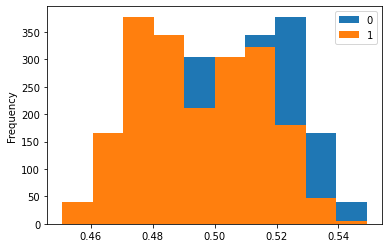

In [89]:
df = pd.DataFrame(zhat)
df.plot.hist()
plt.show()

In [90]:
def z_creator (z_matrix):

    z_label = np.zeros((num_sample,1))

    for i in range(num_sample):

        for j in range(num_cluster):

            if z_matrix[i,j]== 1:

                z_label[i] = j

    return z_label

    

z_label = z_creator(z_matrix)
z_label

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [91]:
z_matrix

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [92]:
def nt(z):
  nt = np.zeros(z.shape)
  nt = np.sum(z,axis = 0)
  return(nt)

In [93]:
n_counter = nt(z_matrix)
n_counter

array([1139.,  860.])

In [94]:
# posterior distribution for weight (Equation)
eta = ([1/num_dimension]*num_cluster)
def probability(eta,n_counter):
  p = np.random.dirichlet(eta+n_counter)
  return p

In [95]:
#def transition_model(num_cluster, theta_matrix_initial):

    #sigma = np.ones((theta_matrix_initial.shape[1])) * 0.15

    #return np.random.normal(theta_matrix_initial,list(sigma))

In [96]:
#tr = transition_model(num_cluster, theta_matrix_initial)
#tr

In [97]:
def log_likelihood(a,b,c,data_normalize, num_cluster,num_sample):
  second_part_one = np.matmul(np.log(data_normalize),(a-1).T)
  one_minus_data = np.subtract(1 , data_normalize) + 0.001
  third_part_one = np.matmul(np.log(one_minus_data),(b-1).T)   
  fifth_part = 1
  pdf = second_part_one+third_part_one+fifth_part
  return pdf



In [98]:
log_like_initial = log_likelihood(a,b,c,data_normalize, num_cluster,num_sample)
log_like_initial



array([[-1166.41558703, -1007.14550074],
       [-1197.70034994, -1105.87568164],
       [-1163.10444276, -1085.06751589],
       ...,
       [ -945.35245814,  -949.4449176 ],
       [ -989.5008575 , -1042.71066676],
       [ -864.21507206,  -984.42445509]])

In [99]:
#hyper_prameter Matrix
u = np.random.randint(1,10,(num_cluster,num_dimension))
v = np.random.randint(1,10,(num_cluster,num_dimension))
r = np.random.randint(1,10,(num_cluster,num_dimension))
s = np.random.randint(1,10,(num_cluster,num_dimension))
f = np.random.randint(1,10,(num_cluster,num_dimension))
g = np.random.randint(1,10,(num_cluster,num_dimension))

In [100]:
# check the sum 
def log_prior1(a,b,c):
  log_p_c = np.absolute((f*np.log(g))+((f-1)*np.log(c))-(g*c)-(gammaln(f)))
  log_p_a = np.absolute((u*np.log(v))+((u-1)*np.log(a))-(v*a)-(gammaln(u)))
  log_p_b = np.absolute((r*np.log(s))+((r-1)*np.log(b))-(s*b)-(gammaln(r)))
  return log_p_a,log_p_b,log_p_c

In [101]:
a_new= np.random.lognormal(a,0.5,(num_cluster,num_dimension))
a_new = np.array(a_new)
b_new = np.random.lognormal(b,0.55,(num_cluster,num_dimension))
b_new = np.array(b_new)
c_new = np.random.lognormal(c,0.45,(num_cluster,num_dimension))
c_new = np.array(c_new)


theta_matrix_new = np.array([a_new,b_new,c_new]).reshape(3,num_dimension*2)
theta_matrix_new
#theta_matrix_initial

array([[2.81809246e+00, 4.78669160e+01, 4.12300277e+00, 5.20936287e+00,
        3.84983938e+03, 9.70644652e+01, 2.36891502e+01, 2.04175695e+02,
        7.98161285e+03, 1.00895405e+02, 2.49383828e+02, 4.27867901e+01,
        1.44917377e+01, 2.45233797e+02, 2.08063046e+03, 5.48788772e+00,
        3.26505000e+00, 3.62984814e+01, 2.03640860e+02, 2.87245051e+01,
        6.33090614e+02, 2.86503018e+03, 6.25366142e+00, 1.27835544e+01,
        3.12215851e+01, 7.07771320e+02, 1.45022713e+02, 4.37224147e+01,
        1.35666121e+00, 1.36527208e+01, 5.26400949e+01, 2.54613713e+02,
        5.49156436e+00, 6.08285999e+03, 1.85010315e+00, 9.48695211e+02,
        9.47310795e+00, 3.28574540e+02, 9.08066692e+01, 2.49203311e+03,
        2.10074572e+02, 1.43786794e+03, 3.64296057e+02, 4.19131779e+00,
        1.22751882e+04, 1.65503305e+01, 3.87529081e+03, 4.86500604e+02,
        5.01077990e+03, 4.03001432e+02, 8.87603697e+02, 2.34995652e+03,
        9.25366646e+00, 4.50872804e+00, 1.56811601e+02, 4.887326

In [102]:
log_prior_new = log_prior1(a_new,b_new,c_new)
log_prior_new

log_prior_old = log_prior1(a,b,c)
log_prior_old

(array([[1.19581801e+00, 1.41805590e+01, 3.72722095e+00, 6.84992387e-01,
         5.34609676e+01, 9.71916876e+00, 1.72333388e+00, 1.76459576e+01,
         5.29869803e+00, 9.30685282e+00, 9.80883038e+00, 1.72433042e+01,
         1.78360468e+00, 1.94356518e+01, 1.80725179e+01, 3.28440426e+00,
         1.85541673e+00, 1.27592339e+00, 1.13068528e+01, 1.13554722e+00,
         1.69507452e+01, 6.19205585e+01, 2.16714048e+00, 1.58027754e+01,
         3.73074594e+00, 1.61720669e+01, 1.74030218e+00, 1.65452801e+01,
         1.71231793e+00, 2.34445158e+00, 8.42253601e+00, 2.82814652e+01,
         2.46582025e-01, 2.95602857e+01, 3.54007819e-01, 1.40110160e+01,
         2.79899709e+00, 3.12359467e+01, 1.74030218e+00, 1.63985414e+01,
         3.58825976e+01, 4.70540899e+01, 3.42316790e+01, 4.90138771e+00,
         3.10301867e+01, 1.92356687e+01, 2.95602857e+01, 3.36138082e+01,
         5.29869803e+00, 3.42082405e+01, 2.97666413e+00, 2.91156832e+01,
         5.93157441e+00, 1.39205585e+01, 1.86137056

In [103]:
log_like_initial = log_likelihood(a,b,c,data_normalize, num_cluster,num_sample)
log_like_initial

log_like_new = log_likelihood(a_new,b_new,c_new,data_normalize, num_cluster,num_sample)
log_like_new = np.absolute(log_like_new)
log_like_new

array([[505304.52486469, 353684.80067928],
       [558062.13752719, 435971.23027753],
       [515999.99956413, 415326.97341593],
       ...,
       [291773.53386256, 387462.79118338],
       [303908.83559384, 402218.07270402],
       [219466.30597303, 412959.48698765]])

In [104]:
theta_matrix_initial.shape

(3, 252)

In [105]:
#theta
theta_initial= np.sum(theta_matrix_initial,axis = 1)
theta_initial = np.sum(theta_initial,axis = 0)
theta_initial

theta_new = np.sum(theta_matrix_new,axis =1)
theta_new = np.sum(theta_new,axis = 0)
theta_new

770564.748779671

In [106]:
#likelihood 
like_new = np.sum(log_like_new, axis = 1)
like_new = np.sum(like_new, axis = 0)

like_old = np.sum(log_like_initial,axis =1)
like_old = np.sum(like_old, axis = 0)


In [107]:
prior_new = np.sum(log_prior_new,axis = 1)
prior_new = np.sum(prior_new,axis = 0)
prior_new = np.sum(prior_new,axis = 0)
prior_new


3963822.814220556

In [108]:
prior_old = np.sum(log_prior_old,axis = 1)
prior_old = np.sum(prior_old, axis = 0)
prior_old  = np.sum(prior_old,axis = 0)
prior_old

8800.83010723399

In [109]:
def y_predicted(z,num_sample):

    dfObj = pd.DataFrame(z_matrix, columns=list("01"))

    maxValueIndexObj = []

    # get the column name of max values in every row

    maxValueIndexObj.append(dfObj.idxmax(axis=1))

    y=[]



    maxValueIndexObj =asarray(maxValueIndexObj).reshape(num_sample, 1)

    y.append([int(i) for i in maxValueIndexObj])

    



    # print(maxValueIndexObj)

    # print("y is:", asarray(y))

    return asarray(y).T




y_predict = y_predicted(z_matrix,num_sample)
y_predict
results = confusion_matrix(y, y_predict)
print ('Confusion Matrix :')
print(results)
score=accuracy_score(y, y_predict)
print ('Accuracy Score :')
print(score)
print ('Report : ')
print(classification_report(y, y_predict))
accuracy = accuracy_score(y, y_predict)

print(a,b)


#print ('Confusion Matrix :')

#print(results) 

#score=accuracy_score(y, y_predict) 

#print ('Accuracy Score :')

#print(score)

#print ('Report : ')

#print(classification_report(y, y_predict))

#accuracy = accuracy_score(y, y_predict)

#print(a_,b_,c_)
#accuracy

Confusion Matrix :
[[991   8]
 [148 852]]
Accuracy Score :
0.9219609804902451
Report : 
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       999
           1       0.99      0.85      0.92      1000

    accuracy                           0.92      1999
   macro avg       0.93      0.92      0.92      1999
weighted avg       0.93      0.92      0.92      1999

[[1. 4. 1. 1. 9. 4. 3. 5. 9. 5. 5. 4. 3. 6. 8. 2. 1. 4. 6. 3. 6. 8. 2. 2.
  4. 6. 5. 4. 1. 2. 5. 6. 1. 8. 1. 6. 2. 5. 5. 8. 5. 7. 5. 2. 9. 4. 8. 6.
  9. 6. 6. 8. 2. 2. 5. 4. 5. 3. 3. 2. 6. 4. 6. 5. 3. 5. 5. 1. 2. 4. 6. 8.
  7. 5. 9. 5. 2. 6. 3. 7. 4. 7. 7. 1. 4. 7. 3. 1. 5. 7. 6. 6. 8. 5. 5. 9.
  2. 5. 3. 3. 2. 2. 2. 9. 7. 3. 8. 2. 9. 1. 3. 6. 3. 2. 4. 7. 2. 7. 7. 7.
  7. 8. 5. 5. 2. 4.]
 [8. 5. 8. 9. 8. 5. 5. 3. 5. 5. 6. 7. 3. 4. 8. 5. 9. 4. 4. 7. 9. 9. 8. 1.
  8. 1. 6. 2. 9. 2. 5. 5. 4. 6. 3. 9. 2. 6. 5. 7. 9. 8. 3. 2. 6. 3. 3. 2.
  1. 6. 5. 1. 2. 1. 8. 5. 1. 4. 3. 8. 9. 8. 3.

In [110]:
def metropolis_hastings(theta_matrix_initial,theta_matrix_new,iterations):
  threshold = np.random.uniform(0, 1)
  accepted = []
  rejected = []

  x = theta_matrix_initial


  for i in range(iterations):
    x_new = theta_matrix_new
    r_nominator = theta_initial+(like_new*prior_new)
    r_denominator = theta_new+(like_old*prior_old)
    ratio = np.absolute(np.divide(r_nominator, r_denominator.T))
    r = np.exp(ratio)
    if r<threshold:
      x = x_new
      print(accepted.append(x_new))
    else:
      print(rejected.append(x_new))
        
      return np.array(accepted).shape, np.array(rejected)


In [111]:
mh = metropolis_hastings(theta_matrix_initial,theta_matrix_new,1000)
mh


None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


((0,), array([[[2.81809246e+00, 4.78669160e+01, 4.12300277e+00, 5.20936287e+00,
          3.84983938e+03, 9.70644652e+01, 2.36891502e+01, 2.04175695e+02,
          7.98161285e+03, 1.00895405e+02, 2.49383828e+02, 4.27867901e+01,
          1.44917377e+01, 2.45233797e+02, 2.08063046e+03, 5.48788772e+00,
          3.26505000e+00, 3.62984814e+01, 2.03640860e+02, 2.87245051e+01,
          6.33090614e+02, 2.86503018e+03, 6.25366142e+00, 1.27835544e+01,
          3.12215851e+01, 7.07771320e+02, 1.45022713e+02, 4.37224147e+01,
          1.35666121e+00, 1.36527208e+01, 5.26400949e+01, 2.54613713e+02,
          5.49156436e+00, 6.08285999e+03, 1.85010315e+00, 9.48695211e+02,
          9.47310795e+00, 3.28574540e+02, 9.08066692e+01, 2.49203311e+03,
          2.10074572e+02, 1.43786794e+03, 3.64296057e+02, 4.19131779e+00,
          1.22751882e+04, 1.65503305e+01, 3.87529081e+03, 4.86500604e+02,
          5.01077990e+03, 4.03001432e+02, 8.87603697e+02, 2.34995652e+03,
          9.25366646e+00, 4.5087